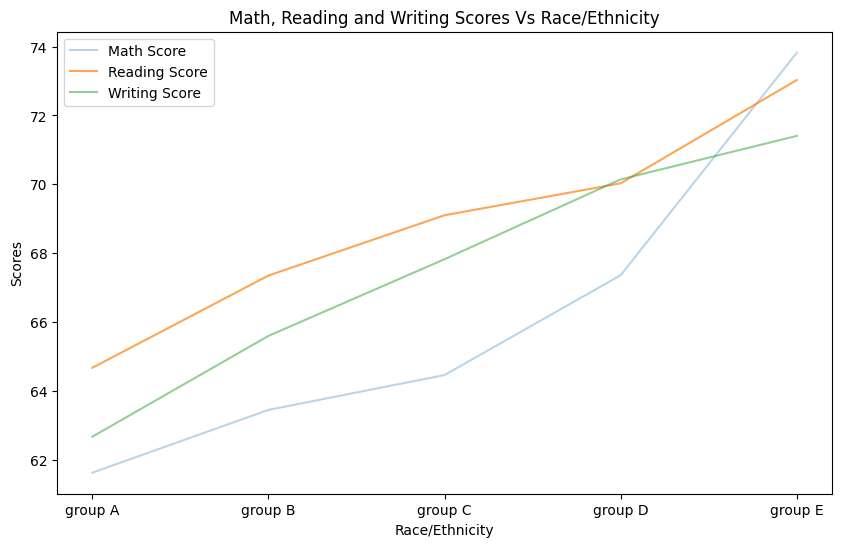

In [3]:
import pandas as pd
import matplotlib.pyplot as mtplt
import numpy as np
import pyodbc

csv_file_path = 'C:/Users/bonik/Downloads/StudentsPerformance.csv'

df = pd.read_csv(csv_file_path)

race_group_data = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()
race_labels = race_group_data.index
math = race_group_data['math score']
reading = race_group_data['reading score']
writing = race_group_data['writing score']

mtplt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(race_labels))

mtplt.plot(race_labels, math, label = "Math Score", alpha=0.3)
mtplt.plot(race_labels, reading, label = "Reading Score", alpha=0.7)
mtplt.plot(race_labels, writing, label = "Writing Score", alpha=0.5)

mtplt.xticks(index, race_labels)

mtplt.xlabel('Race/Ethnicity')
mtplt.ylabel('Scores')
mtplt.title('Math, Reading and Writing Scores Vs Race/Ethnicity')

mtplt.legend()
mtplt.show()

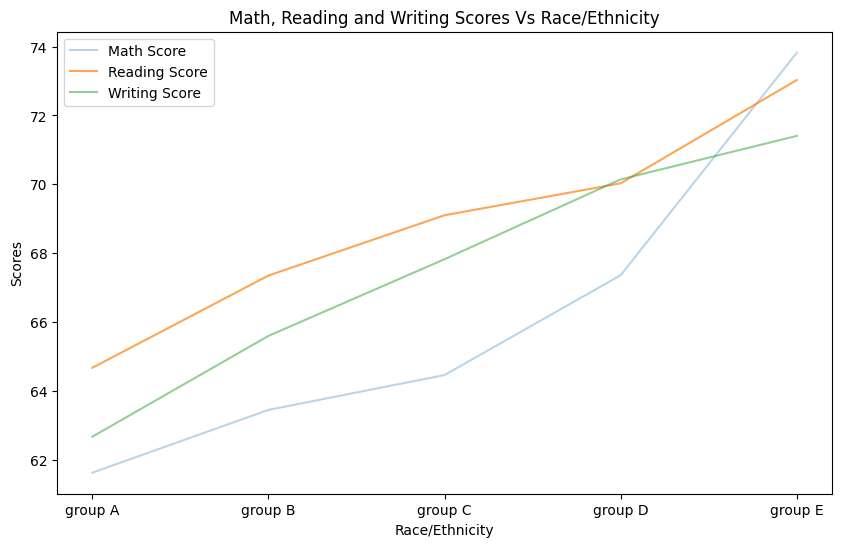

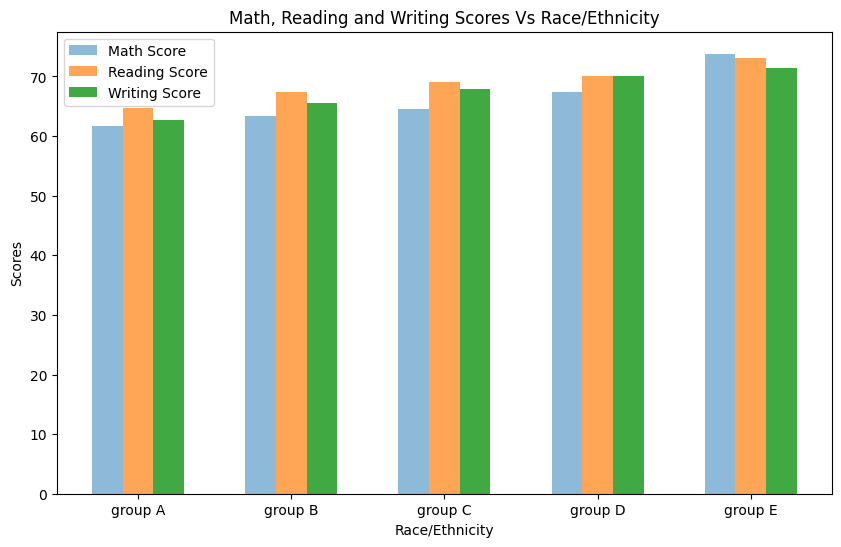

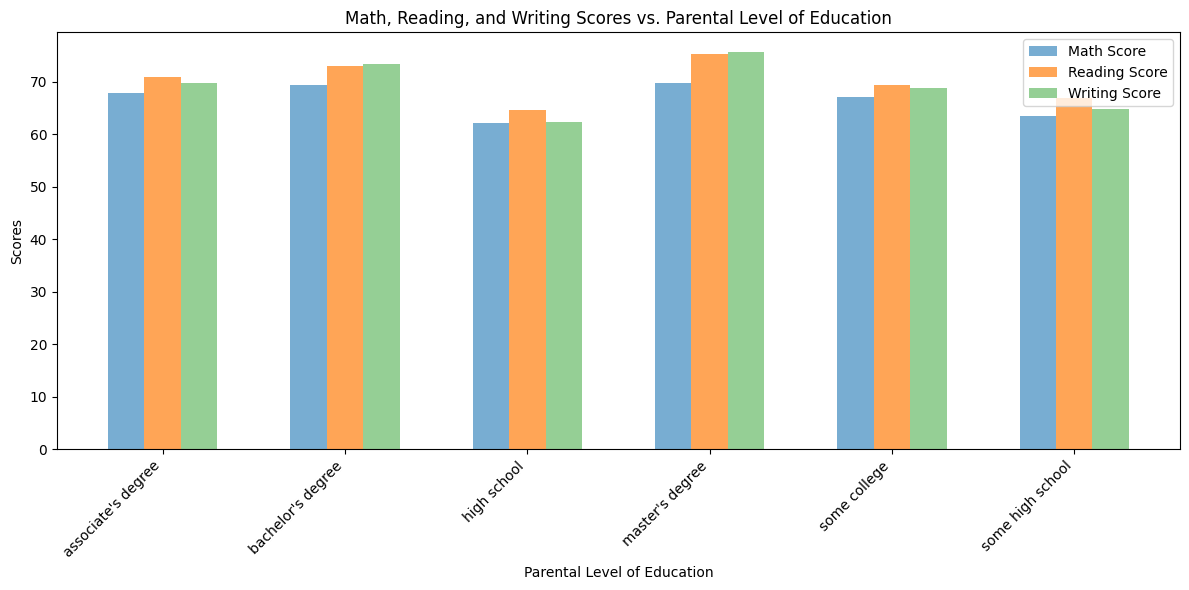

In [5]:
csv_file_path = 'C:/Users/bonik/Downloads/StudentsPerformance.csv'

df = pd.read_csv(csv_file_path)

race_group_data = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()
race_labels = race_group_data.index
math = race_group_data['math score']
reading = race_group_data['reading score']
writing = race_group_data['writing score']

mtplt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(race_labels))

mtplt.plot(race_labels, math, label = "Math Score", alpha=0.3)
mtplt.plot(race_labels, reading, label = "Reading Score", alpha=0.7)
mtplt.plot(race_labels, writing, label = "Writing Score", alpha=0.5)

mtplt.xticks(index, race_labels)

mtplt.xlabel('Race/Ethnicity')
mtplt.ylabel('Scores')
mtplt.title('Math, Reading and Writing Scores Vs Race/Ethnicity')

mtplt.legend()
mtplt.show()


csv_file_path = 'C:/Users/bonik/Downloads/StudentsPerformance.csv'

df = pd.read_csv(csv_file_path)

race_group_data = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()
race_labels = race_group_data.index
math = race_group_data['math score']
reading = race_group_data['reading score']
writing = race_group_data['writing score']

bar_width = 0.2
index = range(len(race_labels))
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, math, bar_width, label='Math Score', alpha=0.5)
bar2 = ax.bar([p + bar_width for p in index], reading, bar_width, label='Reading Score', alpha=0.7)
bar3 = ax.bar([p + 2*bar_width for p in index], writing, bar_width, label='Writing Score', alpha=0.9)

ax.set_xticks([p + bar_width for p in index])
ax.set_xticklabels(race_labels)

ax.set_xlabel('Race/Ethnicity')
ax.set_ylabel('Scores')
ax.set_title('Math, Reading and Writing Scores Vs Race/Ethnicity')

ax.legend()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = 'C:/Users/bonik/Downloads/StudentsPerformance.csv'
df = pd.read_csv(csv_file_path)

grouped_data = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()

education_labels = grouped_data.index
math_scores = grouped_data['math score']
reading_scores = grouped_data['reading score']
writing_scores = grouped_data['writing score']

bar_width = 0.2

plt.figure(figsize=(12, 6))

index = range(len(education_labels))
index_math = [i - bar_width for i in index]
index_reading = index
index_writing = [i + bar_width for i in index]

plt.bar(index_math, math_scores, bar_width, label="Math Score", alpha=0.6)
plt.bar(index_reading, reading_scores, bar_width, label="Reading Score", alpha=0.7)
plt.bar(index_writing, writing_scores, bar_width, label="Writing Score", alpha=0.5)

plt.xticks(index, education_labels, rotation=45, ha="right")

plt.xlabel('Parental Level of Education')
plt.ylabel('Scores')
plt.title('Math, Reading, and Writing Scores vs. Parental Level of Education')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=DESKTOP-LGQ4K7G\SQLEXPRESS;DATABASE=Week7;trusted_connection=yes;')

filtered_data = df[(df['gender'] == 'female') & (df['race/ethnicity'] == 'group A') & (df['test preparation course'] == 'completed')]

create_table_command = """
create table student (
    gender VARCHAR(50),
    race_ethnicity VARCHAR(50),
    test_prep_course VARCHAR(50),
    math_score INT,
    reading_score INT,
    writing_score INT
    );"""
    
cursor = conn.cursor()

cursor.execute(create_table_command)

for _, row in filtered_data.iterrows():
    cursor.execute("INSERT INTO student (gender, race_ethnicity, test_prep_course, math_score, reading_score, writing_score) VALUES (?, ?, ?, ?, ?, ?)",
                   row['gender'], row['race/ethnicity'], row['test preparation course'], row['math score'], row['reading score'], row['writing score'])

select_command = """
select * from student;
"""

cursor.execute(select_command)

res = cursor.fetchall()

print(res)

conn.commit()

conn.close()

[('female', 'group A', 'completed', 55, 65, 62), ('female', 'group A', 'completed', 59, 85, 80), ('female', 'group A', 'completed', 77, 88, 85), ('female', 'group A', 'completed', 92, 100, 97), ('female', 'group A', 'completed', 68, 80, 76), ('female', 'group A', 'completed', 65, 70, 74), ('female', 'group A', 'completed', 72, 79, 82), ('female', 'group A', 'completed', 85, 90, 92), ('female', 'group A', 'completed', 75, 82, 79), ('female', 'group A', 'completed', 34, 48, 41), ('female', 'group A', 'completed', 53, 50, 60), ('female', 'group A', 'completed', 78, 87, 91)]
